In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from data_utils import classification_error, display_confusion_matrix
# from data_utils import LFWUtils


In [13]:
# Set the image path
data_dir = "data/image"
categories = ['family', 'hello', 'help', 'house', 'i_love_you', 'no', 'please', 'sorry', 'thankyou', 'yes']

In [15]:
#load data
def load_images(data_dir, categories):
    data = []
    labels = []
    for label, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Open the image and grayscale it
                img = Image.open(img_path).convert('L')
                img = img.resize((64, 64))  # 调整到固定大小
                data.append(np.array(img).flatten())  # 展平图像
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

In [16]:
# Load and preprocess the data
X_np, y_np = load_images(data_dir, categories)
# X = pd.DataFrame(X_np)
# y = pd.DataFrame(y_np,columns=['label'])

# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Set number of principal components
X_pca = pca.fit_transform(X_scaled)

In [17]:
#  Train-test split, Separate input and output columns for training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_np, test_size=0.2, random_state=42)

# TODO: create a classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
# Train the model using training data and labels
rf_classifier.fit(X_train, y_train)

# Run prediction on train data
train_predictions = rf_classifier.predict(X_train)


Training Accuracy: 100.00%
Training Classification Error: 0.00
Test Accuracy: 9.52%
Confusion Matrix:
 [[0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 1 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1 0]]


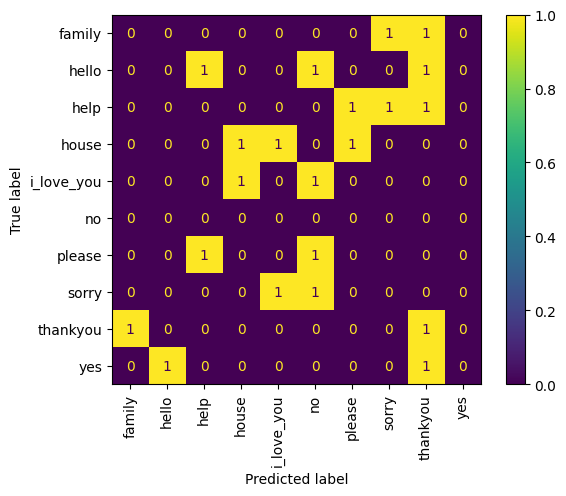

In [19]:
# Validate model with training data
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Classification error for training data
print(f"Training Classification Error: {classification_error(y_train, train_predictions):.2f}")

# Evaluate on the test data
test_predictions = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion matrix for test data
test_confusion_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:\n", test_confusion_matrix)

display_confusion_matrix(y_test, test_predictions, categories)
